## Задача 2

In [191]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline

In [120]:
data = np.load('hw6t2.npy')
X = data[:,0]
Y = data[:,1]

Сначала посмотрим на графики

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


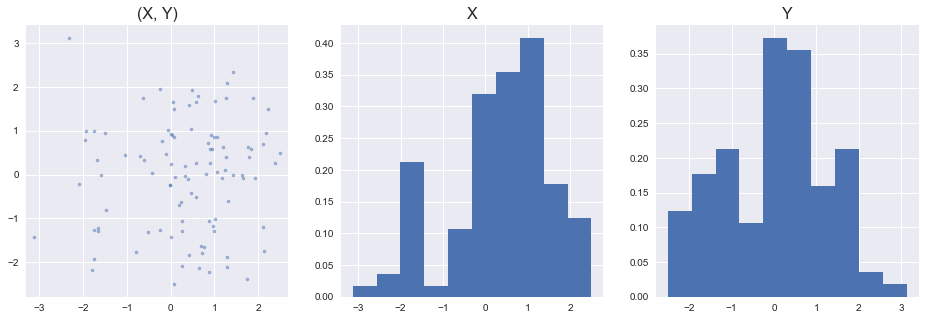

In [121]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.scatter(X, Y, alpha=0.5, s=10)
plt.axis('equal')
plt.title('(X, Y)', fontsize=16)

plt.subplot(1, 3, 2)
plt.hist(X, bins=10, normed=True)
plt.title('X', fontsize=16)

plt.subplot(1, 3, 3)
plt.hist(Y, bins=10, normed=True)
plt.title('Y', fontsize=16)
plt.show()

Судя по графику, распределения выборок не очень похожи.

Видим, что выборки не похожи на нормальные, поэтому t-тест не подойдет.

Сначала проверим выборки на независимость. Это нужно для применения критерия Уилкоксона-Манна-Уитни и критерия Смирнова

In [122]:
print(sps.kendalltau(X, Y))

KendalltauResult(correlation=0.0492929292929293, pvalue=0.46743395879054583)


Гипотеза о независимости не отвергается

Проверим выборки на однородность при помощи критерия Уилкоксона-Манна-Уитни. Преполагаем, что мы имеем дело с независимыми выбрками и кроме того длина выборок равна 100.

In [123]:
print(sps.mannwhitneyu(X, Y, alternative='two-sided'))

MannwhitneyuResult(statistic=5936.0, pvalue=0.022264422023824646)


При помощи критерия Смирнова

In [124]:
print(sps.ks_2samp(X, Y))

Ks_2sampResult(statistic=0.18, pvalue=0.06909243488939824)


Теперь загоним полученные результаты в множественную проверку гипотез

In [125]:
multipletests([sps.kendalltau(X, Y)[1], sps.mannwhitneyu(X, Y, alternative='two-sided')[1], sps.ks_2samp(X, Y)[1]], alpha=0.05, method='holm')

(array([False, False, False]),
 array([0.46743396, 0.06679327, 0.13818487]),
 0.016952427508441503,
 0.016666666666666666)

Таким образом, получили, что гипотеза о независимости не отвергается и гипотеза об однородности не отвергается 

## Задача 3

In [208]:
data = pd.read_csv('weight.txt', sep='\t')
X = np.array(data.iloc[:,0])
Y = np.array(data.iloc[:,1])
data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


Сначала проверим выборку разниц на симметричность. Для этого, как было сказано в лекции, построим график $(-V_{(i)} + \mu, V_{(i)} - \mu)$, где $i = 1, ..., [\frac{n}{2}]$ и если полученный график приближается прямой y=x, то можно считать, что распределение симметрично

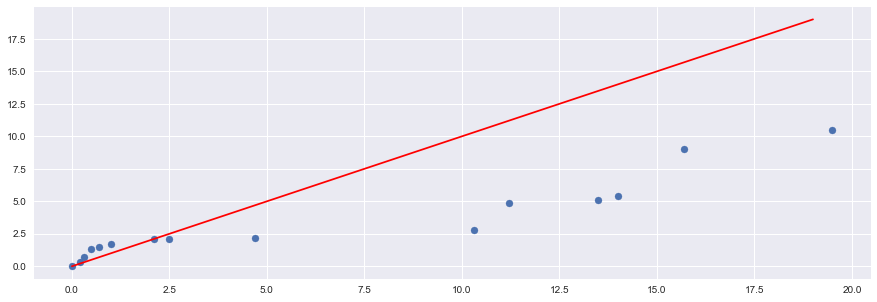

In [209]:
V = X - Y
mu = np.median(V)
n = len(V)

plt.figure(figsize=(15, 5))
plt.scatter(-np.sort(V)[:int(n/2)+1] + mu, np.flip(np.sort(V), axis=0)[:int(n/2)+1] - mu)
plt.plot(np.arange(0, 20), np.arange(0, 20), color='r')
plt.show()

Распределение не похоже на симметричное, поэтому критерий знаковых рангов Уилкоксона не подойдет.

Проверим выборки на нормальность.

In [210]:
print(sps.shapiro(X))
print(sps.shapiro(Y))

(0.9699368476867676, 0.5579800605773926)
(0.9519608616828918, 0.20574407279491425)


Гипотеза о нормальности не отвергается. Проверим выборки на независимость

In [211]:
print(sps.kendalltau(X, Y))

KendalltauResult(correlation=0.4573579036177395, pvalue=0.0005164530410263133)


Проверим выборки на равенство дисперсий с помощью F-критерия

In [212]:
F = np.var(X) / np.var(Y)
p = 1 -sps.f.cdf(F, len(X), len(Y))
print(p)

0.9977440754166822


Теперь проверим гипотезу об отсутствии эффекта с помощью парного  t-теста

In [213]:
print(sps.ttest_rel(X, Y))

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)


До этого момента мы не контролировали FWER, поэтому загоним все в множественную проверку

In [216]:
p1, p2, p3 = sps.shapiro(X)[1], sps.shapiro(Y)[1], sps.kendalltau(X, Y)[1]
p4, p5 = 1-sps.f.cdf(F, len(X), len(Y)), sps.ttest_rel(X, Y)[1]
p1, p2, p3, p4, p5

(0.5579800605773926,
 0.20574407279491425,
 0.0005164530410263133,
 0.9977440754166822,
 0.03502259756218883)

In [217]:
multipletests([p1, p2, p3, p4, p5], alpha=0.05, method='holm')

(array([False, False,  True, False, False]),
 array([1.        , 0.61723222, 0.00258227, 1.        , 0.14009039]),
 0.010206218313011495,
 0.01)

ПОлучили, что не отвергаем гипотезу о нормальной распределенности двух выборок, отвергаем гипотезу о независимости и не отвергаем гипотезу об отсутствии эффекта.

## Задача 4

In [161]:
data = np.load('hw6t4.npy')
X = data[:,0]
Y = data[:,1]

Для начала проверим распределение выборки V = X - Y на симметричность. Это понадобиться нам впоследствии

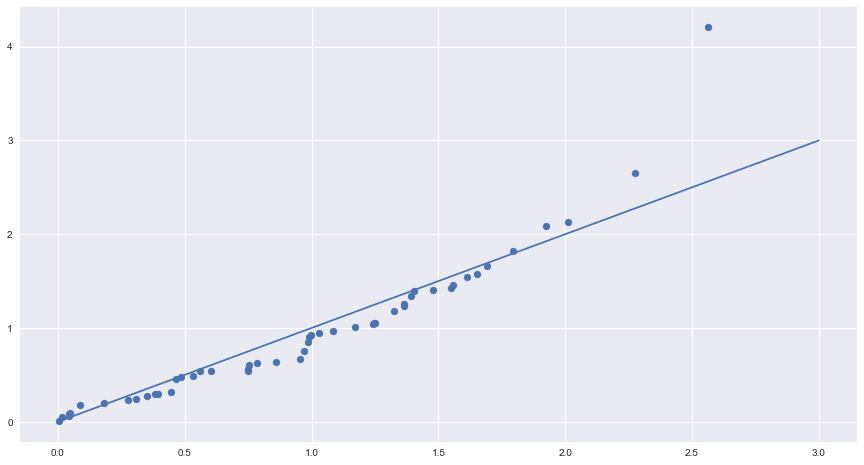

In [162]:
V = X - Y
mu = np.median(V)
n = len(V)

plt.figure(figsize=(15, 8))
plt.scatter(-np.sort(V)[:int(n/2)] + mu, np.flip(np.sort(V), axis=0)[:int(n/2)] - mu)
plt.plot(np.linspace(0,3,10), np.linspace(0,3,10))
plt.show()

Проверим выборки на нормальность

In [165]:
print(sps.shapiro(X))
print(sps.shapiro(Y))

(0.9765814542770386, 0.07177740335464478)
(0.9240764379501343, 2.3313081328524277e-05)


Теперь проверим выборки на независимость

In [166]:
print(sps.kendalltau(X, Y))

KendalltauResult(correlation=0.05010101010101011, pvalue=0.46016634665415723)


Гипотеза о независимости на данном этапе отвергается

Вспомним, что мы проверили выборку разниц на симметричность, поэтому можем применять критерий знаковых рангов Уилкоксона для проверки гипотезы об отсутствии эффекта.

In [159]:
print(sps.ranksums(X, Y))

RanksumsResult(statistic=-1.5551297131093011, pvalue=0.11991517969944168)


До этого мы никак не контролировали FDR, поэтому загоним в множественную проверку по методу Бенджамини-Иекутиели

In [180]:
p1, p2, p3, p4 = sps.shapiro(X)[1], sps.shapiro(Y)[1], sps.kendalltau(X, Y)[1], sps.ranksums(X, Y)[1]
multipletests([p1, p2, p3, p4], alpha=0.1, method='fdr_by')

(array([False,  True, False,  True]),
 array([1.88629909e-01, 9.71378389e-05, 1.00000000e+00, 8.07903338e-22]),
 0.025996253574703254,
 0.025)

Получили, что гипотеза о нормальности X не отвергается, гипотеза о нормальности Y отвергается, гипотеза о независимости X и Y не отвергается, гипотеза об отсутсвии эффекта не отвергается.

## Задача 5

Заметим, что распределение Сьюдента $t_{10}$ очень похоже на нормальное. Проверим это критерием Шапиро-Уилка

In [192]:
X = sps.t.rvs(df=10, size=500)
print(sps.shapiro(X))
print(sps.normaltest(X))
print(sps.kstest(X, sps.norm.cdf))

(0.9968913793563843, 0.45722106099128723)
NormaltestResult(statistic=0.5205936086507893, pvalue=0.7708227683164871)
KstestResult(statistic=0.053463365953165476, pvalue=0.11064856389662991)


Проверим равенство дисперсий

In [203]:
F = np.var(X) / np.var(Y)
p = sps.f.cdf(F, len(X), len(Y))
print(p)

0.9993817981847694


Гипотеза о нормальности не отвергается

Теперь заметим, что критерий Стьюдента не требует строгой нормальности, а требует лишь того, чтоб выборка была похожа на нормальное. То есть критерий Сьюдента устойчив к отклонениям от нормальности. Поэтому в данном случае его можно применять

In [204]:
def perform_tests(test, distr, sizes, n_samples=10000, leave=False):
    pvalues = np.zeros((len(sizes), n_samples))
    for i in tqdm(range(len(sizes))):
        sample1 = distr.rvs(size=(n_samples, sizes[i]))
        sample2 = distr.rvs(size=(n_samples, sizes[i]))
        sample_size = sample1.shape[-1]
        S = np.sqrt((sample_size - 1)*(sample1.std(axis=-1)**2 + sample2.std(axis=-1)**2) / (2*sample_size - 2))
        T = np.sqrt(sample_size / 2) * (sample1.mean(axis=-1) - sample2.mean(axis=-1)) / S
        pvalues[i] = 2 * sps.t(df=sample_size-1).sf(np.abs(T))
    return pvalues

Посмотрим, как меняется реальный уровень значимости в зависимости от размера выборки.
Для этого для каждого размера выборки сгенерируем очень много выборок такого размера из нулевой гипотезы и посчитаем долю случаев, в которых критерий отвергает основную гипотезу.

In [205]:
sizes = np.arange(10, 1000, 10)
n_samples = 10000
pvalues = perform_tests(t_pvalue, sps.t(df=10), sizes, n_samples=n_samples)

100%|██████████| 99/99 [01:41<00:00,  1.02s/it]


Бутстрепные значения pvalue образуют бернуллиевскую выборку, по которой строим доверительный интервал.
Отклонения происходят на величину:

In [206]:
alpha = 0.05
er = 2 * np.sqrt(alpha / n_samples)

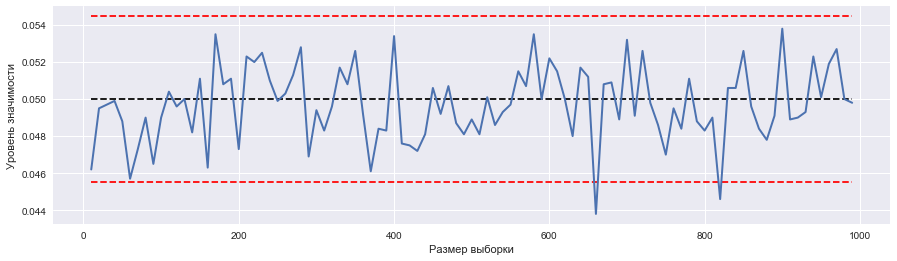

In [207]:
plt.figure(figsize=(15, 4))
plt.plot(sizes, (pvalues < alpha).mean(axis=1), lw=2)
plt.hlines(alpha, sizes.min(), sizes.max(), linestyle='--', color='black')
plt.hlines(alpha - er, sizes.min(), sizes.max(), linestyle='--', color='red')
plt.hlines(alpha + er, sizes.min(), sizes.max(), linestyle='--', color='red')
plt.xlabel('Размер выборки'), plt.ylabel('Уровень значимости');

Как видим, реальный уровень значимости данного критерия лежит около $\alpha = 0.05$, а именно лежит в интервале $(\alpha - 2 \sqrt\frac{\alpha}{n \; samples}, \alpha + 2 \sqrt\frac{\alpha}{n \; samples})$